# Capstone Workbook 1: Data Import and Cleaning

This is the first workbook for my machine learning capstone project, titled 'Accounting for Taste'.

The problem statement for this project is 'Using machine leraning, how might we predict what property characteristics make for an attractive investment and beneficial home improvment, such that rental earning potential can be maximised?'.

As mentioned in the problem statement, this project will revolve around Airbnb listings, focusing on London properties. There are a vast quantity of Airbnb properties globally, ranging in quality and cost. The aim of this project, will be to determine how influencial specific property factors are to the landlords total annual revenue. These can included features about the property type, information regarding what amenities are present within the property, and looking at keywords used by landlords when they are listing their properties online.

The dataset that will be used for this project has been found on Kaggle and is titled, ‘Airbnb Data: Listings Scraped Global Top 10 cities’. This dataset contains 50+ column of information for relative Airbnb listings in 10 global major cities (LA, London, Dubai, Tokyo, Sydney, etc), just the London dataset will be used for this project. 

This first workbook will investigate the quality of the data, cleaning the data so subsequent EDA and modelling can occur:

In [1]:
# Imports

import pandas as pd
import numpy as ny

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# showing all dataframe columns:

pd.set_option('display.max_columns', None)

In [3]:
# set matplotlib global settings eg. figsize:
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [4]:
# Read London Airbnb Data:
airbnb_ldn = pd.read_csv('data/LondonData.csv')

Option settings:

In [5]:
# First look into raw dataframe:
airbnb_ldn.head().T

,0,1,2,3,4
Listing Title,Twin Ensuite with Shower at Colnbrook Lodge Gu...,Single Shared Bathroom at Colnbrook Lodge Gues...,Luxury New Alpine Lodge in Private Walled Garden,Chessington World of Adventures House,Charming house -15min to London
Property Type,Private room in guesthouse,Private room in guesthouse,Entire cabin,Entire home,Private room in home
Listing Type,private_room,private_room,entire_home,entire_home,private_room
Created Date,2022-07-23,2022-07-23,2023-01-18,2022-07-22,2022-12-12
Last Scraped Date,2022-07-27,2022-08-03,2023-05-03,2022-08-03,2023-10-11
Country,GB,GB,GB,GB,GB
State,UK,UK,UK,UK,UK
City,Colnbrook,Colnbrook,Claygate,Greater London,Chessington
Zipcode,SL3 0,SL3 0,KT10 0,KT9 2,KT9 2
Currency Native,GBP,GBP,GBP,GBP,GBP


In [6]:
# checking dimensions of dataframe:
airbnb_ldn.shape

(43580, 54)

The dataframe consists of 54 columns and 43580 rows.

In [7]:
# More thorough check of data included in dataset:
airbnb_ldn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43580 entries, 0 to 43579
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Listing Title                                      43576 non-null  object 
 1   Property Type                                      43580 non-null  object 
 2   Listing Type                                       43580 non-null  object 
 3   Created Date                                       43580 non-null  object 
 4   Last Scraped Date                                  43580 non-null  object 
 5   Country                                            43580 non-null  object 
 6   State                                              43580 non-null  object 
 7   City                                               43580 non-null  object 
 8   Zipcode                                            43580 non-null  object 
 9   Curren

Some more indepth analysis of the various columns will be conducted. 

Any columns that are not necessary for the modelling process shall be dropped. 
- Columns that are semantically the same will be dropped.
- Columns that do not serve any relevant purpose and don't add additional value to the future insights will be dropped.

To begin, columns that can be deemed uneccessary will be dropped:

- The two columns 'country' and 'state' can be dropped. As this is the London dataset, all the pieces of data on these columns will be the same and won't   serve any value. 
- There are numerous columns that have some monetary information. There are duplicates, with columns being in both native currency (GBP) and USD. When models are created, these columns will be collinear (they are the same information just scaled). For that reason, the USD columns will be dropped (they could be reincluded at a later date, if comparisons are to be made between various cities). The columns that have these currency duplicates are: 'Cleaning fee', 'Extra people fee', 'Average daily rate' and 'Annual revenue LTM'. These columns will all be dropped.
- Two other columns which don't add to the insights are the 'Date Created' and the 'Last scraped' column.
The relevant timeframe values are all based on the 'Last Twelve Months' [LTM]. Where the timeframe is relevant, the LTM detail has been listed in the column title. Knowledge of when the column was created and when data was last scraped from it, does not aid in any form of comparative insight.
- License column, is made up entirely of null values. Can be dropped.
- The instant bookable column also contains many null values, and isn't a particularly valuable independent value, this column will be dropped. Instantbook availalbe is not very useful, will be dropped too.
- Drop 'currency native' column, it does not add any value (all data is known to be in GBP).
- Drop property ID column (it does not add any particular value to the dataframe and potential analysis).
- Drop Listing URL, not relevant information.
- Picture url can be dropped.



A quick check will be conducted, to ensure these columns do not have any greater value than initially assumed:

In [8]:
# Dropping descrbied columns:
airbnb_ldn.drop(columns =['Country', 'State', 'Cleaning Fee (USD)', 'Extra People Fee (USD)', 
                          'Average Daily Rate (USD)', 'Annual Revenue LTM (USD)','Created Date', 
                          'Last Scraped Date', 'License', 'instant_bookable', 'Currency Native',
                          'Airbnb Property ID', 'Listing URL', 'Exact Location', 'Instantbook Enabled',
                          'picture_url'], inplace=True )

In [9]:
airbnb_ldn.shape

(43580, 38)

There are now 38 columns, indicating the 16 listed columns deemed unecessary have now been dropped. Beyond just looking at columns that are duplicated currency columns, other columns that have semantic similarities will be identified and addressed.

To simplify this process, the dataframe will be split into two groups based on their datatypes. One group will contain just 'object' columns and the other will contain 'int' and 'flaot' (all numerical) columns.

In [10]:
num_cols = airbnb_ldn.select_dtypes(exclude='object')
obj_cols = airbnb_ldn.select_dtypes(include ='object')

To begin, the object dataframe will be checked for semantic duplicates:

In [11]:
obj_cols.head().T

,0,1,2,3,4
Listing Title,Twin Ensuite with Shower at Colnbrook Lodge Gu...,Single Shared Bathroom at Colnbrook Lodge Gues...,Luxury New Alpine Lodge in Private Walled Garden,Chessington World of Adventures House,Charming house -15min to London
Property Type,Private room in guesthouse,Private room in guesthouse,Entire cabin,Entire home,Private room in home
Listing Type,private_room,private_room,entire_home,entire_home,private_room
City,Colnbrook,Colnbrook,Claygate,Greater London,Chessington
Zipcode,SL3 0,SL3 0,KT10 0,KT9 2,KT9 2
Bedrooms,1,1,1,3,1
Airbnb Superhost,f,f,t,f,f
Cancellation Policy,NaN,NaN,NaN,strict_14_with_grace_period,NaN
Check-in Time,3:00 PM - 11:00 PM,3:00 PM - 11:00 PM,1:00 PM - 9:00 PM,NaN,4:00 PM - 10:00 PM
Checkout Time,11:00 AM,11:00 AM,11:00 AM,11:00 AM,9:00 AM


Initial observations:
- Bedroom column is an 'object' datatype, although it would be more suited to being a 'int' datatype. It will be converted accordingly.
- 'City' column has lots of values that aren't necessarily 'London' zones, these will addressed.
- Similarly, the 'Zipcode' column has none London postcodes, to be addressed.
- 'Property Type' and 'Listing Type' look to have fairly similar semantic meaning, these will be investigated.
- 'Check-in Time' and 'Checkout Time' contain information related to time. The datatype for these columns could be altered, or the columns may be unecessary altogether.

There are a vast quantity of properties within this dataset, covering a range of different areas. The dataset contains a large quantity of properties that are on the outer edges of London. For the purpose of this project, only properties within the London postal districts will be considered, these are: W, SW, SE, E, N, NW, WC and EC. All rows that do not have a postcode that starts with one of these 8 letter combinations will be dropped.

In [12]:
# create a dataframe, containing only those rows that have the relevant postcodes:
ldn_pd_airbnb = airbnb_ldn[airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('W') |
            airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('E') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SE') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('SW') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('NE') |
            airbnb_ldn['Zipcode'].str.slice(0,1).str.contains('N') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('NW') |
            airbnb_ldn['Zipcode'].str.slice(0,2).str.contains('WC') |
            airbnb_ldn['Zipcode'].str.slice(0,3).str.contains('EC') 
            ]

In [13]:
# check shape of 'London' specific postcode dataframe:
ldn_pd_airbnb.shape

(38316, 38)

Some of the previously identified column issues will be addressed:

To begin, the column 'Bedrooms' will be investigated:

In [14]:
ldn_pd_airbnb['Bedrooms'].value_counts()

1         22699
2          8928
3          2960
Studio     2179
4          1039
5           354
6            87
0            30
7            22
8             8
10            4
9             2
16            1
15            1
12            1
22            1
Name: Bedrooms, dtype: int64

'Studio' is included within the bedroom column. 

The 'Property Type' for the 'Studio' bedroom type properties will be viewed, to see if there is a common theme and easy way to categorise the 'Studio' properties:

In [15]:
(ldn_pd_airbnb[ldn_pd_airbnb['Bedrooms'] == 'Studio'])['Property Type']

498               Entire rental unit
775                 Entire apartment
917      Private room in rental unit
979                Entire guesthouse
1010     Private room in rental unit
                    ...             
42916          Private room in condo
42974    Private room in rental unit
43161             Entire rental unit
43204           Private room in home
43264           Private room in home
Name: Property Type, Length: 2179, dtype: object

The 'studio' bedroom occurs in a significant number of rows and across a large amount of different property types. Hence, the best way to deal with this column will be to convert the 'Studio' bedroom type into a representive numeric value, and for the column datatype to be converted to a numerical type. This will be completed in the preprocessing stage.

Now, 'Property type' and 'listing type' will be compared:

In [16]:
print(f"The number of different property types is {ldn_pd_airbnb['Property Type'].nunique()}.")
print(f"The number of different listing types is {ldn_pd_airbnb['Listing Type'].nunique()}.")

The number of different property types is 87.
The number of different listing types is 4.


There is a very small number of listing types, just 4. These will be viewed:

In [17]:
ldn_pd_airbnb['Listing Type'].unique()

array(['entire_home', 'private_room', 'shared_room', 'hotel_room'],
      dtype=object)

The Property Type will be viewed:

In [18]:
ldn_pd_airbnb['Property Type'].unique()

array(['Entire home', 'Private room in house', 'Entire rental unit',
       'Private room in rental unit', 'Private room in home',
       'Private room in casa particular', 'Private room in townhouse',
       'Entire townhouse', 'Private room in condo', 'Entire condo',
       'Private room in houseboat', 'Private room in bed and breakfast',
       'Entire apartment', 'Entire guesthouse', 'Entire residential home',
       'Entire floor', 'Shared room in bed and breakfast',
       'Entire condominium (condo)', 'Entire loft',
       'Entire serviced apartment', 'Private room in serviced apartment',
       'Private room in residential home', 'Entire bungalow',
       'Private room in condominium', 'Private room',
       'Entire guest suite', 'Private room in apartment',
       'Entire vacation home', 'Room in boutique hotel', 'Room in hotel',
       'Shared room in home', 'Entire cottage', 'Entire house',
       'Private room in guest suite', 'Private room in loft',
       'Private room in

The quantity and values of 'Property Types' and 'Listing Type' indicate that 'Listing Type' is a defined category that Airbnb set and all properties listed must fall into one of these categories. Whereas the 'Property Type' column, looks to be a more personalised title for the property, the fact there are only 87 distinct values for this column (when there are 30000+ rows), suggests that this column still has some Airbnb pre-set option list that the landlord can choose from, but this column could be considered a sub-category, with the 'Listing Type' being the primary category. 

Both columns are relevant and will be kept in the dataframe, their manner of processing in the following stages will differ. 

In [19]:
obj_cols.head().T

,0,1,2,3,4
Listing Title,Twin Ensuite with Shower at Colnbrook Lodge Gu...,Single Shared Bathroom at Colnbrook Lodge Gues...,Luxury New Alpine Lodge in Private Walled Garden,Chessington World of Adventures House,Charming house -15min to London
Property Type,Private room in guesthouse,Private room in guesthouse,Entire cabin,Entire home,Private room in home
Listing Type,private_room,private_room,entire_home,entire_home,private_room
City,Colnbrook,Colnbrook,Claygate,Greater London,Chessington
Zipcode,SL3 0,SL3 0,KT10 0,KT9 2,KT9 2
Bedrooms,1,1,1,3,1
Airbnb Superhost,f,f,t,f,f
Cancellation Policy,NaN,NaN,NaN,strict_14_with_grace_period,NaN
Check-in Time,3:00 PM - 11:00 PM,3:00 PM - 11:00 PM,1:00 PM - 9:00 PM,NaN,4:00 PM - 10:00 PM
Checkout Time,11:00 AM,11:00 AM,11:00 AM,11:00 AM,9:00 AM


Both 'Check-in Time' and 'Checkout Time' are columns that portray time related information. Converting these columns to a 'datetime' datatype is an option. Overall, 'Check-in Time' and 'Checkout Time' are not particularly important when considering the overall revenue and thus success of an airbnb property. Yes, both checkin time and checkout time of a property are aspects that can impact your overall experience with a property (particuarly early checkout time or late checkin time could cause some customer dissatisfication), but this is negligible when compared to other more critical factors that influence a properties success. 

The checkin and checkout time columns will be explored further:

In [20]:
# View the distinct number of 'Check-in Time' values:
print(obj_cols['Check-in Time'].nunique())


165


There is a large quantity of distinct values for the checkin time column. This will be viewed in greater detail:

In [21]:
# View the 'Check-in Time' values:
print(obj_cols['Check-in Time'].value_counts())


After 3:00 PM                    14953
After 2:00 PM                     3441
Flexible                          2937
After 4:00 PM                     2181
3:00 PM - 10:00 PM                1583
                                 ...  
10:00 PM - 12:00 AM                  1
After 11:00 PM                       1
After 5:00 AM                        1
10:00 PM - 2:00 AM (next day)        1
After %{time}                        1
Name: Check-in Time, Length: 165, dtype: int64


There is a large amount of variation in the offered 'Check-in' times for the various London Airbnb properties. The most common checkin time is 'After 3:00pm', with 'After 2:00PM' being second most common (with a significant difference between the most common option)

In [22]:
print(obj_cols['Checkout Time'].unique())

['11:00 AM' '9:00 AM' '10:00 AM' '12:00 PM' nan '12:00 AM' '3:00 PM'
 '5:00 PM' '1:00 PM' '6:00 PM' '2:00 PM' '8:00 AM' '7:00 PM' '4:00 PM'
 '8:00 PM' '1:00 AM' '11:00 PM' '7:00 AM' '6:00 AM' '9:00 PM' '2:00 AM'
 '3:00 AM' '10:00 PM']


There is a smaller number of unique 'Checkout Time' values. The checkin and checkout time columns will be further addressed during the preprocessing stage.

Some of the row information will be checked, to determine where there are present null values and what their patterns/relevance could be:

<Axes: >

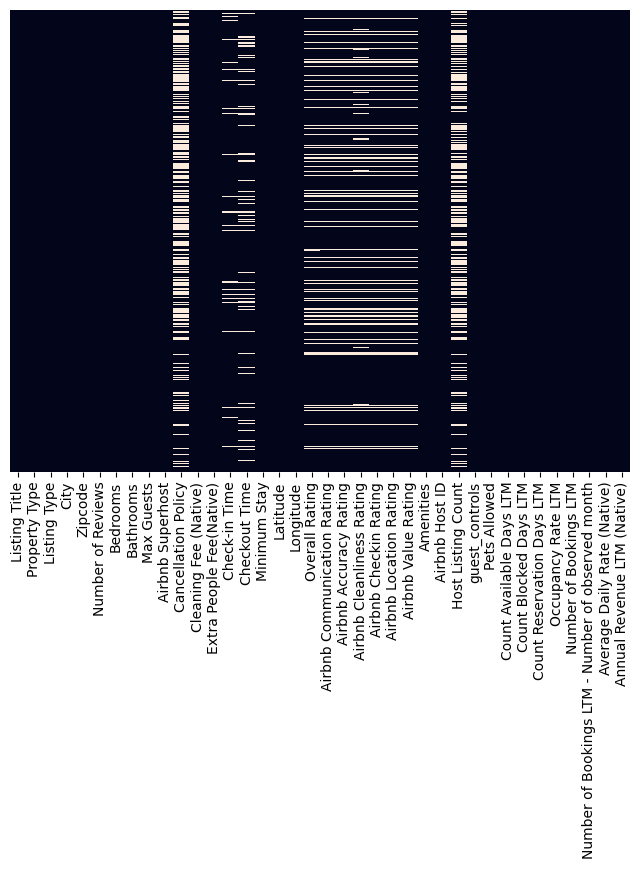

In [23]:
sns.heatmap(ldn_pd_airbnb.isnull(), yticklabels=False, cbar=False)

There are many lines of data that have null values for all of the different 'rating' columns. For the purpose of this model, the rating component will be essential to the ultimate output. Hence, columns that do not have this relevant information will not be useful for any form of insights. All columns that have null values for all rating rows will be dropped:

In [24]:
# return columns that have null values for all rating rows:

ldn_pd_airbnb[ldn_pd_airbnb[['Overall Rating', 
            'Airbnb Communication Rating', 
            'Airbnb Accuracy Rating', 
            'Airbnb Cleanliness Rating',
            'Airbnb Checkin Rating',
            'Airbnb Location Rating',
            'Airbnb Value Rating']].isnull().any(axis=1)]

,Listing Title,Property Type,Listing Type,City,Zipcode,Number of Reviews,Bedrooms,Bathrooms,Max Guests,Airbnb Superhost,Cancellation Policy,Cleaning Fee (Native),Extra People Fee(Native),Check-in Time,Checkout Time,Minimum Stay,Latitude,Longitude,Overall Rating,Airbnb Communication Rating,Airbnb Accuracy Rating,Airbnb Cleanliness Rating,Airbnb Checkin Rating,Airbnb Location Rating,Airbnb Value Rating,Amenities,Airbnb Host ID,Host Listing Count,guest_controls,Pets Allowed,Count Available Days LTM,Count Blocked Days LTM,Count Reservation Days LTM,Occupancy Rate LTM,Number of Bookings LTM,Number of Bookings LTM - Number of observed month,Average Daily Rate (Native),Annual Revenue LTM (Native)
242,London's Best 2 Bedroom Spacious Family Home,Entire home,entire_home,Greater London,SW15 3,0,2,2,6,f,strict_14_with_grace_period,154.8,0.0,After 12:00 PM,10:00 AM,5,51.428980,-0.258460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Air conditioning...",270027187,2.0,"{""allows_children"": true, ""allows_infants"": tr...",False,9,356,7,60,2,0,271.8,2747.6
243,Lovely house with free parking near wimbledon,Private room in house,private_room,Greater London,SW15 3,0,1,2,1,f,moderate,11.9,0.0,2:00 PM - 8:00 PM,12:00 PM,1,51.426500,-0.257720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Hot tub', 'Wifi'...",151209872,0.0,"{""allows_children"": false, ""allows_infants"": f...",False,56,309,12,26,1,-9,37.1,552.2
248,Maisonette in-between Richmond Park & Wimbledon,Private room in rental unit,private_room,Greater London,SW15 3,0,1,1,2,f,strict_14_with_grace_period,0.0,0.0,12:00 PM - 10:00 PM,11:00 AM,1,51.435420,-0.254690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Breakfas...",4350839,0.0,"{""allows_children"": false, ""allows_infants"": f...",False,0,365,0,55,0,6,64.0,387.1
359,"Entire top floor, spacious room & private bath...",Private room in house,private_room,Greater London,W13 9,1,1,1,2,f,flexible,15.8,15.9,After 3:00 PM,NaN,3,51.499000,-0.320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Wifi', 'Kitchen', 'Dedicated workspace', 'Ha...",378586929,NaN,"{""allows_children"": false, ""allows_infants"": f...",False,6,359,5,55,0,8,62.4,377.6
403,"Spacious family home, recently fully modernised",Entire home,entire_home,Greater London,SW14 8,0,4,4,8,f,NaN,0.0,0.0,After 3:00 PM,11:00 AM,10,51.460000,-0.265000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Kitchen'...",10344333,NaN,"{""allows_children"": true, ""allows_infants"": tr...",False,32,333,8,30,1,-3,224.4,2153.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43253,Victorian Splendour,Entire home,entire_home,London,E18 2,0,5,3,8,f,NaN,0.0,0.0,After 3:00 PM,11:00 AM,2,51.598930,0.019440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Air conditioning...",24233224,NaN,"{""allows_children"": true, ""allows_infants"": tr...",False,88,277,74,100,1,-2,299.4,26348.1
43256,"Bright, Cosy and Spacious",Private room in rental unit,private_room,Greater London,E18 2,0,1,1,1,f,NaN,0.0,0.0,After 3:00 PM,NaN,1,51.597000,0.026000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Kitchen'...",98394803,NaN,"{""allows_children"": false, ""allows_infants"": f...",False,38,327,23,73,7,5,37.9,1052.3
43270,Clean and quiet one-bed flat,Entire rental unit,entire_home,Greater London,E18 1,0,1,1,2,f,NaN,0.0,0.0,NaN,NaN,4,51.595147,0.031477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Kitchen', 'Washe...",518399720,NaN,"{""allows_children"": false, ""allows_infants"": f...",False,80,285,47,70,1,-2,54.5,3052.6
43271,Neat One Bedroom,Entire rental unit,entire_home,Greater London,E18 1,0,1,1,2,f,NaN,0.0,0.0,After 3:00 PM,NaN,5,51.596668,0.033472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Free parking on premises', 'Wifi', 'Kitchen'...",518399720,NaN,"{""allows_children"": false, ""allows_infants"": f...",True,53,312,34,77,1,-2,49.8

There are rows that have null values just on certain columns of the different column ratings sub-categories. 'Overall Rating' is the most important 'rating' column and hence, all rows that have a null value for this column will be dropped.

In [25]:
# drop all rows with null values in 'Overall Rating' column:
ldn_pd_airbnb.dropna(subset=['Overall Rating'], inplace=True)

C:\Users\blcm9\AppData\Local\Temp\ipykernel_14636\4194125165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_pd_airbnb.dropna(subset=['Overall Rating'], inplace=True)


Looking at the remaining null values:

In [26]:
ldn_pd_airbnb.isnull().sum()

Listing Title                                            4
Property Type                                            0
Listing Type                                             0
City                                                     0
Zipcode                                                  0
Number of Reviews                                        0
Bedrooms                                                 0
Bathrooms                                                0
Max Guests                                               0
Airbnb Superhost                                         0
Cancellation Policy                                  13682
Cleaning Fee (Native)                                    0
Extra People Fee(Native)                                 0
Check-in Time                                         1757
Checkout Time                                         3142
Minimum Stay                                             0
Latitude                                                

There are many null values in the 'Cancellation Policy' column, this column is an object column and will be further explored in the preprocessing stage. 'Check-in Time' and 'Checkout Time' are also object columns and will be further evaluated in the preprocessing stage.

Of the additional nulls in the rating columns, the 'Cleanilness Rating' column has a significant number of nulls (960). Looking at the Airbnb website description of the different rating types, the 'Cleanliness Rating' column is a mark of whether the property met the Airbnb cleanliness standards. As this column has a significant number of nulls, and the 'Cleanliness Rating', while important in many ways, is not a massively influencial in determining what factors are most influencial in predicting a high annual revenue; this column will be dropped. The 'Host Listing Count' column will also be dropped.

In [27]:
ldn_pd_airbnb.drop(columns = ['Airbnb Cleanliness Rating', 'Host Listing Count'], inplace=True)

C:\Users\blcm9\AppData\Local\Temp\ipykernel_14636\28042181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_pd_airbnb.drop(columns = ['Airbnb Cleanliness Rating', 'Host Listing Count'], inplace=True)


The other rating columns quantity of null values will be viewed:

There are only 9 rows with null values for the other airbnb rating sub-categories. This is a small proportion of the overall dataset and hence these rows can be dropped.

In [28]:
ldn_pd_airbnb.dropna(subset=['Airbnb Communication Rating', 'Airbnb Accuracy Rating', 'Airbnb Checkin Rating', 'Airbnb Location Rating', 'Airbnb Value Rating'], inplace=True)

C:\Users\blcm9\AppData\Local\Temp\ipykernel_14636\1174019900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_pd_airbnb.dropna(subset=['Airbnb Communication Rating', 'Airbnb Accuracy Rating', 'Airbnb Checkin Rating', 'Airbnb Location Rating', 'Airbnb Value Rating'], inplace=True)


The 'Listing Title' 4 null rows will be dropped:

In [29]:
ldn_pd_airbnb.dropna(subset='Listing Title', inplace=True)

C:\Users\blcm9\AppData\Local\Temp\ipykernel_14636\311794465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldn_pd_airbnb.dropna(subset='Listing Title', inplace=True)


In [30]:
ldn_pd_airbnb.isnull().sum()

Listing Title                                            0
Property Type                                            0
Listing Type                                             0
City                                                     0
Zipcode                                                  0
Number of Reviews                                        0
Bedrooms                                                 0
Bathrooms                                                0
Max Guests                                               0
Airbnb Superhost                                         0
Cancellation Policy                                  13677
Cleaning Fee (Native)                                    0
Extra People Fee(Native)                                 0
Check-in Time                                         1757
Checkout Time                                         3141
Minimum Stay                                             0
Latitude                                                

Now the null values have been initally addressed, the dataframe will be checked for duplicate rows.

In [31]:
# Check for duplicate rows:
ldn_pd_airbnb.duplicated().sum()

0

There are zero duplicate rows present in the dataframe.

The dataframe index will be reset to account for the various rows that have been dropped.

In [32]:
airbnb_ldn_final = ldn_pd_airbnb.reset_index(drop=True).copy()

This dataframe will be saved as a CSV:

In [33]:
airbnb_ldn_final.shape

(32674, 36)

In [36]:
airbnb_ldn_final.to_csv('airbnb_ldn_clean.csv')

## Conclusion

The data have been effectively cleaned and compiled to prepare it for the following project workbooks. The London specific properties have been isolated and columns that require additional attention and processing have been identified. The size of the available data has been reduced, but the 32674 rows of data will still be sufficient for effective machine learning modelling. The quantity of columns has been reduced to 36, although this will not remain constant, as planned later staging processing will increase this number significantly. 

The dataset is now ready for initial EDA.